In [7]:
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X)
print(X[1])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


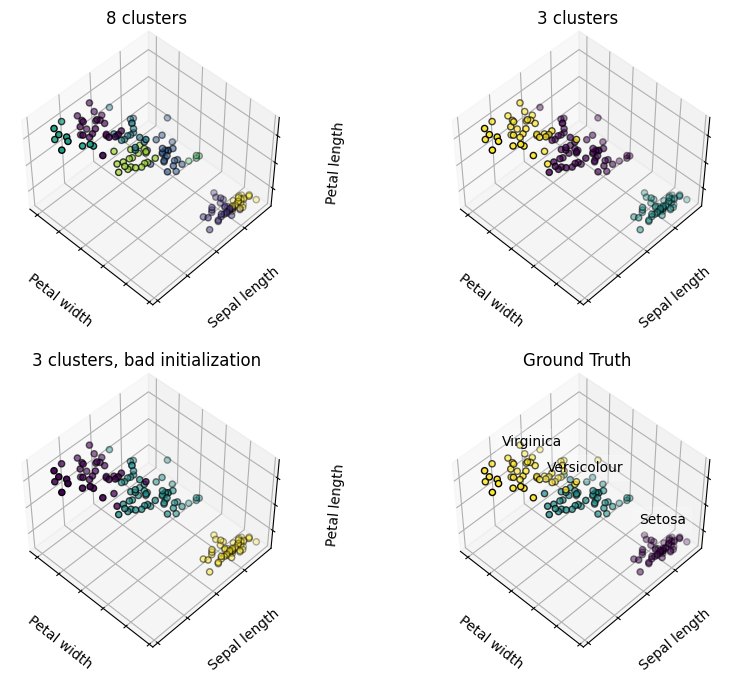

In [8]:

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]
# 클러스터링을 수행할 세 가지 다른 KMeans 모델을 정의하는 리스트
# "k_means_iris_bad_init" : 3개의 클러스터를 사용하여 KMeans 알고리즘을 실행, 그러나 n_init 매개변수를 사용하여 초기화를 한 번만 실행하도록 설정

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)): #enumerate idx와 요소를 전달
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134) 
    #  projection : 3D 플롯을 생성하는 데 필요한 키워드, elev : 고도, azim : 방위각 
    est.fit(X) #주어진 데이터에 대해 클러스터링을 수행
    labels = est.labels_ #클러스터링이 완료된 후, 각 데이터 포인트에 할당된 클러스터 레이블 저장

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")
    # iris 데이터셋의 경우 보통 petal width를 x축, sepal length를 y축, 그리고 petal length를 z축으로 사용하여 데이터를 시각화
    # 첫 번째 열은 sepal length(꽃받침 길이)를, 두 번째 열은 sepal width(꽃받침 너비)를, 세 번째 열은 petal length(꽃잎 길이)를, 
    # 네 번째 열은 petal width(꽃잎 너비)를 나타낸다

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    #  3D 산점도 위에 텍스트를 추가하는 함수
    ax.text3D( 
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2, # z축으로 약간 떨어진 위치에 텍스트를 배치하기 위해 사용
        name,
        horizontalalignment="center", #텍스트가 중앙 정렬되도록 설정
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"), #텍스트 주변에 상자를 그리는 데 사용, 
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

### Elbow Method to find K

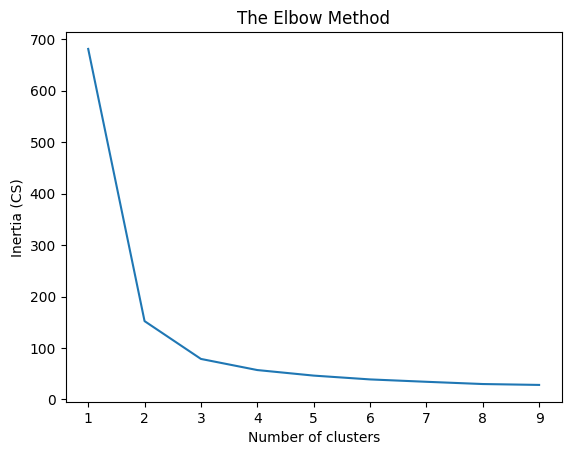

In [9]:
from sklearn.cluster import KMeans

# 빈 리스트 생성 (클러스터 개수에 따른 불변량 저장)
cs = []

# KMeans 객체 생성을 위한 반복문
for i in range(1, 10):
  # KMeans 객체 생성
  # n_init : 초기 중심값 설정을 몇 번 반복할지 설정
  # init : 초기 중심값 설정 방법(K-means++ / random)
  # max_iter : 최대 반복 횟수를 지정
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  
  # KMeans 모델 학습
  kmeans.fit(X)
  
  # 불변량 값 추출하여 리스트에 저장
  cs.append(kmeans.inertia_)

# Elbow method 그래프 생성
plt.plot(range(1, 10), cs)  # x축: 클러스터 개수, y축: 불변량
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (CS)')
plt.show()

### Silhoutte Analysis to find K

In [13]:
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 10)
silhouette_scores = []
#X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

for n_clusters in n_clusters_range:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"Best number of clusters: {best_n_clusters}")
print(f"Corresponding silhouette score: {best_silhouette_score}")

Best number of clusters: 2
Corresponding silhouette score: 0.6810461692117462


#### result 

- iris dataset의 경우, class가 3개이다. 
- elbow method의 경우, 적절한 k값은 2-3
- silhouette analysis의 경우 적절한 k값은 2로 판단하고 있다.

따라서, 결론  
클러스터링 알고리즘은 데이터의 분포와 패턴을 기반으로 클러스터를 형성하기 때문에, 실루엣 점수가 높은 클러스터 수가 항상 실제 클래스 수와 일치하지는 않습니다.  
실루엣 점수는 단순히 클러스터링 결과의 내적 일관성을 측정하기 때문에, 외부적인 지식이나 도메인 지식을 고려하여 최적의 클러스터 수를 선택하는 것이 바람직합니다.  